<a href="https://colab.research.google.com/github/pripalazzo/Iniciacao_Machine_Learning/blob/main/Trabalho_Pr%C3%A1tico_IGTI_(Regress%C3%A3o)_M%C3%B3dulo_3_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #biblioteca utilizada para trabalhar com dataframes
import numpy as np #biblioteca utilizada no tratamento de matrizes e vetores
import seaborn as sn #biblioteca utilizada pra plotar os gráficos em um formato mais "elegante"
import matplotlib.pyplot as plt  #biblioteca utilizada para plotar os gráficos

In [ ]:
df=pd.read_csv('diabetes_numeric.csv') #carregamento do df 
df.head(10)  #exibindo as 10 primeiras linhas do df

In [3]:
print('Dimensão do dataframe: {}'.format(df.shape))

Dimensão do dataframe: (43, 3)


In [4]:
df.info() #mostra as características do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43 non-null     float64
 1   deficit    43 non-null     float64
 2   c_peptide  43 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


In [5]:
print("Tipos de dados existentes do dataset: \n{}".format(df.dtypes.value_counts()))

Tipos de dados existentes do dataset: 
float64    3
dtype: int64


In [6]:
print("Tipos de dados existentes do dataset: {}".format(df.dtypes.nunique()))

Tipos de dados existentes do dataset: 1


In [ ]:
df.isnull()

In [8]:
df.isnull().sum()

age          0
deficit      0
c_peptide    0
dtype: int64

In [ ]:
dir(pd) #quanto tiver dúvida no código pandas

In [9]:
n_instancias, n_atributos=df.shape  #verificando a quantidade de instancias e atributos
print("Número de Instancias e Atributos ({},{})".format(n_instancias,n_atributos))

Número de Instancias e Atributos (43,3)


In [10]:
#encontrando a descrição "estatística" para as variáveis
df.describe()

,age,deficit,c_peptide
count,43.000000,43.000000,43.000000
mean,9.032558,-8.148837,4.746512
std,4.022539,7.123080,0.720565
min,0.900000,-29.000000,3.000000
25%,5.500000,-12.700000,4.450000
50%,10.400000,-7.800000,4.900000
75%,11.850000,-2.000000,5.100000
max,15.600000,-0.200000,6.600000


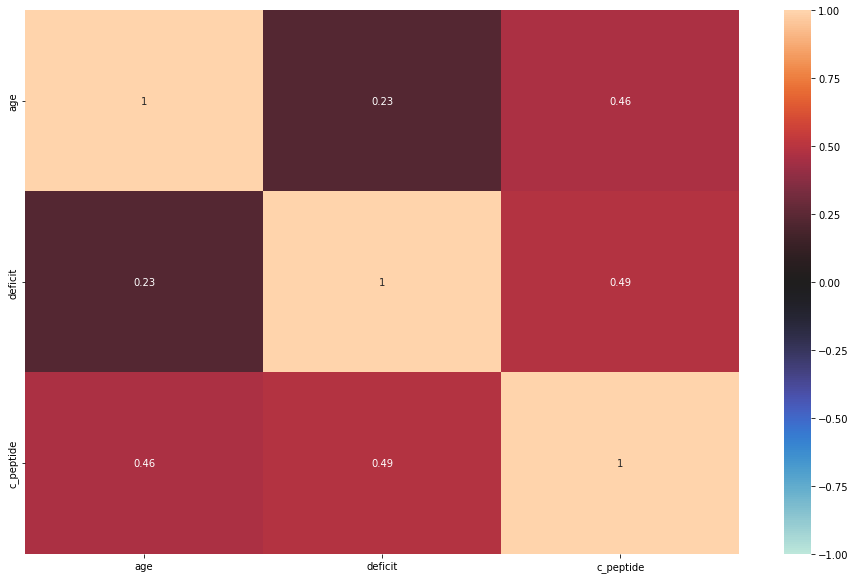

In [11]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(16, 10))
matriz_de_correlação = df.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [12]:
#substituindo o valor médio para as colunas "age","deficit","c_peptide"
#df=df[["age","deficit","c_peptide"]] #filtrando os valores necessários 
#df=.fillna(df.mean())  #aplicando a modificação para os valores nulos
#df.isnull().sum()  #avaliando se os valores foram preenchidos

In [13]:
#selecionando as variáveis para os modelos de regressão 
entradas_regressao=df[['age','deficit']] #variáveis independentes
saida_regressao=df['c_peptide'] #variáveis dependentes

In [14]:
entradas_regressao.shape

(43, 2)

In [15]:
saida_regressao.shape

(43,)

In [16]:
# divisão em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entradas_regressao, saida_regressao,
                                                    random_state=5762,
                                                    test_size=.37)

In [17]:
# visualização
X_train.head()

,age,deficit
22,11.3,-3.6
3,10.6,-7.8
1,8.8,-16.1
42,10.8,-13.5
5,1.8,-19.2


In [18]:
# visualização
X_train.count()

age        27
deficit    27
dtype: int64

In [19]:
# visualização
X_test.head()

,age,deficit
29,9.8,-1.2
33,5.1,-5.1
12,7.9,-13.9
8,5.8,-2.8
20,11.1,-6.1


In [20]:
# visualização
X_test.count()

age        16
deficit    16
dtype: int64

In [21]:
# Fitting multiple linear regression
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
regressao= reg.fit (X_train, y_train) # encontra os coeficientes (realiza a regressão)

In [23]:
# Prediction
y_pred = regressao.predict(X_test)

In [37]:
#importar biblioteca para cálculo de métricas
from sklearn import metrics

print("R2", metrics.r2_score(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE", metrics.mean_absolute_error(y_test, y_pred))

R2 0.016814158185133876
MSE 0.4405517496663409
RMSE 0.6637407247309306
MAE 0.5322924084179863


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-square = %.3f' % r2)

R-square = 0.017


In [27]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [28]:
#parâmetros encontrados
print('Y = {}X1 + {}X2 + {}'.format(reg.coef_[0],reg.coef_[1],reg.intercept_))

R_2 = r2_score(y_test, y_pred)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = 0.0890156624771863X1 + 0.0379752467668712X2 + 4.260780617911122
Coeficiente de Determinação (R2): 0.016814158185133876
